In [84]:
import gzip
import numpy as np
import struct
import matplotlib.pyplot as plt
from status import Status, parse_status

In [130]:
LOC = 'DAQ_2025-06-06T12-49-37'

In [131]:
s = Status("manager")
status = parse_status(s.from_file(LOC))[0]
dataset_start_time_t = status['dataset_start_time_t']

with gzip.GzipFile(f'{LOC}/DATA_0/EOS.gz', 'rb') as f:
    buf = f.read(1_000_000_000)

In [132]:
it = struct.iter_unpack(">lQ2s", buf)

In [133]:
ev = list(it)

In [134]:
frames =  [ev[i][0] for i in range(len(ev)) if ev[i][-1] == b'\x00~']
t0 = [ev[i][1] for i in range(len(ev)) if ev[i][-1] == b'\x00~']
t4 = [ev[i][1] for i in range(len(ev)) if ev[i][-1] != b'\x00~']
t4ADC = [ev[i][2] for i in range(len(ev)) if ev[i][-1] != b'\x00~']
t4ADC = np.frombuffer(b"".join(t4ADC), dtype=np.float16)

In [135]:
idx = np.searchsorted(np.array(t0) / 1e9, dataset_start_time_t)
idx

np.int64(89)

In [136]:
_t0 = np.array(t0) / 1e9
_t0[idx - 1], _t0[idx], dataset_start_time_t, 1000*(dataset_start_time_t - _t0[idx - 1]), 1000*(dataset_start_time_t - _t0[idx])

(np.float64(1749178186.7560432),
 np.float64(1749178186.7972014),
 1749178186.783513,
 np.float64(27.469873428344727),
 np.float64(-13.688325881958008))

In [ ]:
delay = [15, 10, 5, 3.472
pre = [38, 35, 31.2, 27.469]
post = [-2.815, -5.35, -10, -13.69]

In [92]:
t0_s = np.array(t0) / 1e9
t4_s = np.array(t4) / 1e9

In [73]:
np.mean(1/np.diff(t0_s)), np.mean(1/np.diff(t4_s))

/home/andrew/dev3/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andrew/dev3/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(np.float64(24.00110504350708), np.float64(nan))

In [19]:
# t0_s -= start
# t4_s -= start

t4_s -= t0_s[0]
t0_s -= t0_s[0]


In [20]:
(42.18/360) * (1/24) * 1000

4.881944444444444

(0.0, 1.0)

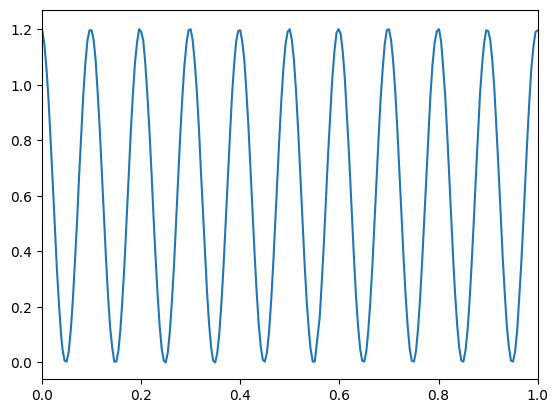

In [21]:
plt.plot(t4_s, t4ADC)
plt.xlim(0, 1)

In [22]:
(t0_s * 1000)[:10]

array([  0.        ,  41.67771339,  83.72044563, 125.3426075 ,
       167.03772545, 208.67824554, 249.89199638, 291.59021378,
       333.17661285, 375.31518936])

In [79]:
np.mean((t4_s * 1000) - (t0_s * 1000))

ValueError: operands could not be broadcast together with shapes (3690,) (383,) 

In [124]:
25.6/1024/10*3600*24*5

1080.0

In [23]:
np.min(np.diff(t0_s)), np.max(np.diff(t0_s))

(np.float64(0.03900456428527832), np.float64(0.044226884841918945))

In [24]:
np.max(np.diff(t4_s)), np.min(np.diff(t4_s))

(np.float64(0.009861946105957031), np.float64(0.00011444091796875))